In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
movie_path = r'..\data\raw\tmdb_5000_movies.csv'
credit_path = r'..\data\raw\tmdb_5000_credits.csv'

In [8]:
movie_df = pd.read_csv(movie_path)
movie_df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [9]:
credit_df = pd.read_csv(credit_path)
credit_df.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [10]:
movie_df['id'].is_unique


True

In [11]:
credit_df['movie_id'].is_unique


True

In [13]:
print("Unique ids in movies dataset : ",movie_df['id'].nunique(),"length of movies dataset", len(movie_df))
print("Unique ids in Credits dataset : ",credit_df['movie_id'].nunique(),"length of credits dataset", len(credit_df))


Unique ids in movies dataset :  4803 length of movies dataset 4803
Unique ids in Credits dataset :  4803 length of credits dataset 4803


In [14]:
missing_in_credits = set(movie_df['id']) - set(credit_df['movie_id'])
len(missing_in_credits)


0

In [15]:
missing_in_movies = set(credit_df['movie_id']) - set(movie_df['id'])
len(missing_in_movies)


0

### 🔍 Movie ID Consistency Check

Before merging the datasets, we verified the integrity of the movie IDs in both datasets.

**Observations:**
- All movie IDs in the movies dataset are **unique**
- All movie IDs in the credits dataset are **unique**
- There are **no missing or extra IDs** between the two datasets

**Conclusion:**
Both datasets contain the **same set of movie IDs with a one-to-one correspondence**.  
Therefore, the datasets are **fully aligned and safe to merge** using `movie_id` as the key.


In [16]:
merged_df = movie_df.merge(
    credit_df,
    left_on='id',
    right_on='movie_id',
    how='inner',
    validate='one_to_one'
)
print(merged_df.shape)
merged_df.head(1)

(4803, 24)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [17]:
(merged_df['id'] == merged_df['movie_id']).all()


True

In [18]:
merged_df.drop(columns=['title_y','movie_id'], inplace=True)
merged_df.rename(columns={'title_x': 'title'}, inplace=True)
print("Done...")

Done...


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

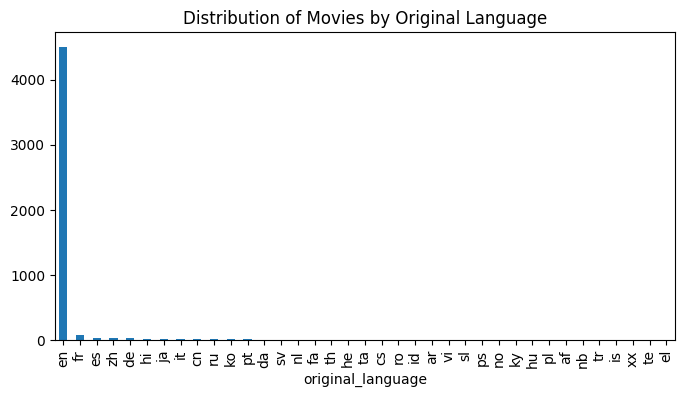

In [20]:
merged_df['original_language'].value_counts().plot.bar(
    figsize=(8, 4),
    title='Distribution of Movies by Original Language'
)
plt.show()

In [21]:
#   genres
#   id 
#   keywords              
#   title                 
#   overview              
#   cast
#   crew

df = merged_df[['id','genres','keywords','title','overview','cast','crew']].copy()
df.head(2)     

,id,genres,keywords,title,overview,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [22]:
df.isnull().sum()

id          0
genres      0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

### As Only 3 record's overview is missing we can drop them

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

id          0
genres      0
keywords    0
title       0
overview    0
cast        0
crew        0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [30]:
df.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [36]:
df.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [27]:
def convert(obj):
    lst = []
    for i in eval(obj):
        lst.append(i['name'])
    return lst

In [37]:
df['genres'] = df['genres'].apply(convert)

In [38]:
df['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4800, dtype: object

In [40]:
df['keywords'] = df['keywords'].apply(convert)

In [41]:
df['keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4798    [united states–mexico barrier, legs, arms, pap...
4799                                                   []
4800    [date, love at first sight, narration, investi...
4801                                                   []
4802            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4800, dtype: object

In [42]:
df.iloc[0].cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [43]:
def convert_cast(obj):
    lst = []
    for i in eval(obj)[:3]:
        lst.append(i['name'])
    return lst

In [45]:
df['cast'] = df['cast'].apply(convert_cast)
df['cast']

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4798    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4799         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4800           [Eric Mabius, Kristin Booth, Crystal Lowe]
4801            [Daniel Henney, Eliza Coupe, Bill Paxton]
4802    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4800, dtype: object

In [46]:
df.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [47]:
def fetch_director(obj):
    lst = []
    for i in eval(obj):
        if i['job']=='Director':
            lst.append(i['name'])
    return lst

In [49]:
df['crew'] = df['crew'].apply(fetch_director)
df['crew']

0                                [James Cameron]
1                               [Gore Verbinski]
2                                   [Sam Mendes]
3                            [Christopher Nolan]
4                               [Andrew Stanton]
                          ...                   
4798                          [Robert Rodriguez]
4799                              [Edward Burns]
4800                               [Scott Smith]
4801                               [Daniel Hsia]
4802    [Brian Herzlinger, Jon Gunn, Brett Winn]
Name: crew, Length: 4800, dtype: object

In [52]:
df['overview'] = df['overview'].apply(lambda x: x.split())
df['overview'] 

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4798    [El, Mariachi, just, wants, to, play, his, gui...
4799    [A, newlywed, couple's, honeymoon, is, upended...
4800    ["Signed,, Sealed,, Delivered", introduces, a,...
4801    [When, ambitious, New, York, attorney, Sam, is...
4802    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4800, dtype: object

In [53]:
df.head()

,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [56]:
df['cast'] = df['cast'].apply(lambda x : [i.replace(" ","") for i in x])
df['crew'] = df['crew'].apply(lambda x : [i.replace(" ","") for i in x])
df['keywords'] = df['keywords'].apply(lambda x : [i.replace(" ","") for i in x])
df['genres'] = df['genres'].apply(lambda x : [i.replace(" ","") for i in x])

In [57]:
df.head()

,id,genres,keywords,title,overview,cast,crew
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [58]:
df['tags'] = df['overview']+df['genres']+df['keywords']+df['cast']+df['crew']

In [59]:
df.head()

,id,genres,keywords,title,overview,cast,crew,tags
0,19995,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [61]:
new_df = df[['id','title','tags']].copy().reset_index(drop=True)
new_df.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [63]:
new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))

In [64]:
new_df.iloc[5].tags

"The seemingly invincible Spider-Man goes up against an all-new crop of villain – including the shape-shifting Sandman. While Spider-Man’s superpowers are altered by an alien organism, his alter ego, Peter Parker, deals with nemesis Eddie Brock and also gets caught up in a love triangle. Fantasy Action Adventure dualidentity amnesia sandstorm loveofone'slife forgiveness spider wretch deathofafriend egomania sand narcism hostility marvelcomic sequel superhero revenge TobeyMaguire KirstenDunst JamesFranco SamRaimi"

In [66]:
new_df['tags'] = new_df['tags'].apply(lambda x : x.lower())

In [67]:
new_df.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [68]:
path = r'..\DataSet\processed\cleaned_data.csv'
new_df.to_csv(path,index=False)
print("DataFrame saved in 'DataSet\processed\cleaned_data.csv' ...")

DataFrame saved in 'DataSet\processed\cleaned_data.csv' ...
